In [2]:
from cvzone.HandTrackingModule import HandDetector
import cv2

import numpy as np

In [108]:
cap=cv2.VideoCapture(0)

detector=HandDetector(maxHands=1)

padding=15

while True:
    
    ret,image=cap.read()
    a=image.copy()
    hands,frame=detector.findHands(image)
    
    if hands:
        hand=hands[0]
        x,y,w,h=hand['bbox']
        hand_img=a[y-padding:y+h+padding,x-2*padding:x+w+padding]
        
        black_img=np.zeros((350,350,3),dtype=np.uint8)
        try:
            black_img[0:hand_img.shape[0],0:hand_img.shape[1]]=hand_img
        except:
            cv2.putText(frame,'Move your hand back a little!',(x+10,y-20), cv2.FONT_HERSHEY_TRIPLEX, 0.75, (0,255,0), 1)
        
        cv2.imshow('background',black_img)
        cv2.namedWindow("Hand_Image", cv2.WINDOW_NORMAL)
        
        cv2.imshow('Hand_Image',hand_img)
        cv2.namedWindow("Hand_Image", cv2.WINDOW_NORMAL)

        
    cv2.imshow('Image',frame)
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    
    if cv2.waitKey(1) == ord('s'):
        cv2.imwrite('test11.jpg',black_img)

    if cv2.waitKey(1) == ord('p'):
        predict_img(hand_img)

    if cv2.waitKey(1) == ord('a'):
        break

cap.release()    
cv2.destroyAllWindows()

In [105]:
cap.release()    
cv2.destroyAllWindows()

B


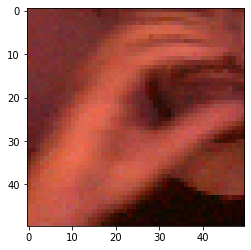

In [111]:
predict_img(hand_img)

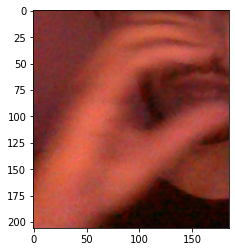

In [109]:
plt.imshow(hand_img)

In [76]:
def show(i,c=False):
    rect={'x':[],'y':[]}
    def click_event(event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            print(f'x={x} y={y}')
            rect['x'].append(x)
            rect['y'].append(y)
            if len(rect['y'])==2:
                icopy=i.copy()
                cv2.rectangle(icopy,(rect['x'][0],rect['y'][0]),(rect['x'][1],rect['y'][1]),(255,0,0),3)
                cv2.imshow('Image',icopy)
                rect['x'].clear()
                rect['y'].clear()
             
                
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow('Image',i)
    if c:
        cv2.setMouseCallback('Image',click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [52]:
show(frame)

In [85]:
import tensorflow as tf

model = tf.keras.models.load_model('asl_model1.h5')

In [87]:
import matplotlib.pyplot as plt

In [96]:
classes={}
for i,j in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    classes[i]=j

In [89]:
test_img=cv2.imread('test11.jpg')
print(test_img.shape)


(350, 350, 3)


In [90]:
test_img.shape

(350, 350, 3)

B


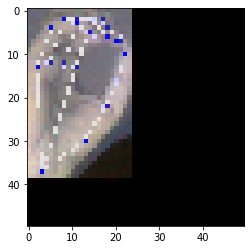

In [101]:
predict_img(test_img)

In [98]:
def predict_img(img):
    test_img=cv2.resize(img,(50,50),interpolation=cv2.INTER_CUBIC)

    plt.imshow(test_img)

    test_ans=model.predict(test_img.reshape(-1,50,50,3),verbose=0)

    print(classes[np.where(test_ans==1)[1][0]])

In [94]:
test_ans

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

'B'